# Link a la visualización de Tableau

https://public.tableau.com/profile/pbarrantes#!/vizhome/Filmaffinity/Filmaffinity?publish=yes

# Librerías

In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Creación del contenido de la futura base de datos

In [2]:
df = pd.read_csv('./data/pelistop.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11508 entries, 0 to 11507
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   11508 non-null  int64  
 1   Título       11508 non-null  object 
 2   Año          11508 non-null  int64  
 3   Director/es  11508 non-null  object 
 4   Reparto      11508 non-null  object 
 5   Género/s     11508 non-null  object 
 6   País         11508 non-null  object 
 7   Puntuación   11508 non-null  float64
 8   Nº votos     11508 non-null  int64  
 9   Tipo         11508 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 899.2+ KB


In [4]:
df.head(3)

,Unnamed: 0,Título,Año,Director/es,Reparto,Género/s,País,Puntuación,Nº votos,Tipo
0,0,Fahrenheit 9/11,2004,['Michael Moore'],"['Documental', ' (intervenciones de: Michael M...","['Documental', '11-S', 'Guerra de Iraq']",Estados Unidos,6.99,69775,Película
1,1,La noche más oscura (Zero Dark Thirty),2012,['Kathryn Bigelow'],"['Jessica Chastain', 'Joel Edgerton', 'Taylor ...","['Thriller', 'Acción', 'Drama', 'Terrorismo', ...",Estados Unidos,6.79,36704,Película
2,2,La última noche,2002,['Spike Lee'],"['Edward Norton', 'Philip Seymour Hoffman', 'B...","['Drama', 'Película de culto', '11-S']",Estados Unidos,7.49,33793,Película


In [5]:
df.drop(columns='Unnamed: 0', inplace=True)

In [6]:
type(df.loc[0,'Reparto'])

str

In [7]:
type(eval(df.loc[0,'Reparto']))

list

In [8]:
df.loc[0,'Reparto']

"['Documental', ' (intervenciones de: Michael Moore', 'George W. Bush', 'George Bush)']"

In [9]:
df['Reparto'] = df['Reparto'].str.replace("(\['Documental')[^\]]*(\])","['Documental'"+']')

In [10]:
df.loc[0,'Reparto']

"['Documental']"

#### Convertimos las columnas "Director/es", "Género/s" y "Reparto" a lista

In [11]:
df['Director/es'] = df['Director/es'].apply(lambda x: eval(x))

In [12]:
df['Género/s'] = df['Género/s'].apply(lambda x: eval(x))

In [13]:
df['Reparto'] = df['Reparto'].apply(lambda x: eval(x))

In [14]:
type(df.loc[0,'Reparto'])

list

#### Añadimos una columna con la década

In [15]:
df['Década'] = df['Año'].apply(lambda x: x - int(str(x)[-1]))

#### Reseteamos el índice para poder asignar ese índice al id de la película

In [16]:
df.reset_index(inplace=True)

In [17]:
df.rename(columns={
    'index':'id_peli',
    'Título':'titulo',
    'Año':'año',
    'Década':'decada',
    'Director/es':'direccion',
    'Reparto':'actor',
    'Género/s':'genero',
    'País':'pais',
    'Puntuación':'puntuacion',
    'Nº votos':'votos',
    'Tipo': 'tipo'
}, inplace=True)

In [18]:
df.columns

Index(['id_peli', 'titulo', 'año', 'direccion', 'actor', 'genero', 'pais',
       'puntuacion', 'votos', 'tipo', 'decada'],
      dtype='object')

In [19]:
columns = ['id_peli', 'titulo', 'año', 'decada', 'direccion', 'actor', 'genero', 'pais', 'puntuacion', 'votos', 'tipo']

In [20]:
df = df[columns]

In [21]:
df.head()

,id_peli,titulo,año,decada,direccion,actor,genero,pais,puntuacion,votos,tipo
0,0,Fahrenheit 9/11,2004,2000,[Michael Moore],[Documental],"[Documental, 11-S, Guerra de Iraq]",Estados Unidos,6.99,69775,Película
1,1,La noche más oscura (Zero Dark Thirty),2012,2010,[Kathryn Bigelow],"[Jessica Chastain, Joel Edgerton, Taylor Kinne...","[Thriller, Acción, Drama, Terrorismo, 11-S, Ba...",Estados Unidos,6.79,36704,Película
2,2,La última noche,2002,2000,[Spike Lee],"[Edward Norton, Philip Seymour Hoffman, Barry ...","[Drama, Película de culto, 11-S]",Estados Unidos,7.49,33793,Película
3,3,Zeitgeist: The Movie,2007,2000,[Peter Joseph],[Documental],"[Documental, Religión, 11-S, Cine independient...",Estados Unidos,7.36,21808,Película
4,4,United 93 (Vuelo 93),2006,2000,[Paul Greengrass],"[Christian Clemenson, Cheyenne Jackson, Ben Sl...","[Drama, 11-S, Basado en hechos reales, Terrori...",Estados Unidos,6.70,19146,Película


## DataFrame: Películas

In [23]:
df_pelis = df[['id_peli', 'titulo', 'año', 'decada', 'pais', 'tipo', 'puntuacion', 'votos']]

In [24]:
df_pelis.head()

,id_peli,titulo,año,decada,pais,tipo,puntuacion,votos
0,0,Fahrenheit 9/11,2004,2000,Estados Unidos,Película,6.99,69775
1,1,La noche más oscura (Zero Dark Thirty),2012,2010,Estados Unidos,Película,6.79,36704
2,2,La última noche,2002,2000,Estados Unidos,Película,7.49,33793
3,3,Zeitgeist: The Movie,2007,2000,Estados Unidos,Película,7.36,21808
4,4,United 93 (Vuelo 93),2006,2000,Estados Unidos,Película,6.70,19146


## DataFrame: Dirección

In [25]:
df_dir = df.explode('direccion')[['direccion']].drop_duplicates()

In [26]:
df_dir.reset_index(inplace=True)

In [27]:
df_dir.drop(columns='index', inplace=True)

In [28]:
df_dir.reset_index(inplace=True)

In [29]:
df_dir.rename(columns={'index':'id_dir'}, inplace=True)

In [30]:
df_dir.head()

,id_dir,direccion
0,0,Michael Moore
1,1,Kathryn Bigelow
2,2,Spike Lee
3,3,Peter Joseph
4,4,Paul Greengrass


## DataFrame: Actores

In [31]:
df_act = df.explode('actor')[['actor']].drop_duplicates()

In [32]:
df_act.reset_index(inplace=True)

In [33]:
df_act.drop(columns='index', inplace=True)

In [34]:
df_act.reset_index(inplace=True)

In [35]:
df_act.rename(columns={'index':'id_act'}, inplace=True)

In [36]:
df_act.head()

,id_act,actor
0,0,Documental
1,1,Jessica Chastain
2,2,Joel Edgerton
3,3,Taylor Kinney
4,4,Kyle Chandler


## DataFrame: Género

In [37]:
df_gen = df.explode('genero')[['genero']].drop_duplicates()

In [38]:
df_gen.reset_index(inplace=True)

In [39]:
df_gen.drop(columns='index', inplace=True)

In [40]:
df_gen.reset_index(inplace=True)

In [41]:
df_gen.rename(columns={'index':'id_gen'}, inplace=True)

In [42]:
df_gen.head()

,id_gen,genero
0,0,Documental
1,1,11-S
2,2,Guerra de Iraq
3,3,Thriller
4,4,Acción


## DataFrame: Películas - Dirección

In [43]:
peli_dir = pd.merge(df.explode('direccion'), df_dir, on='direccion', how='inner')[['id_peli','id_dir']]

In [44]:
peli_dir.head()

,id_peli,id_dir
0,0,0
1,2075,0
2,7476,0
3,1,1
4,2523,1


## DataFrame: Películas - Actores

In [45]:
peli_act = pd.merge(df.explode('actor'), df_act, on='actor', how='inner')[['id_peli','id_act']]

In [46]:
peli_act.head()

,id_peli,id_act
0,0,0
1,3,0
2,10,0
3,13,0
4,14,0


## DataFrame: Películas - Género

In [47]:
peli_gen = pd.merge(df.explode('genero'), df_gen, on='genero', how='inner')[['id_peli','id_gen']]

In [48]:
peli_gen.head()

,id_peli,id_gen
0,0,0
1,3,0
2,10,0
3,13,0
4,14,0


## Export a csv

In [49]:
df_pelis.to_csv('./data/1-pelis.csv', index=False)

In [50]:
df_dir.to_csv('./data/2-direccion.csv', index=False)

In [51]:
df_act.to_csv('./data/3-actores.csv', index=False)

In [52]:
df_gen.to_csv('./data/4-genero.csv', index=False)

In [53]:
peli_dir.to_csv('./data/5-pelis-direccion.csv', index=False)

In [54]:
peli_act.to_csv('./data/6-pelis-actores.csv', index=False)

In [55]:
peli_gen.to_csv('./data/7-pelis-genero.csv', index=False)

# SQL

In [56]:
%load_ext sql

In [57]:
%sql sqlite:///./data/movies.db

'Connected: @./data/movies.db'

In [58]:
db_url = 'sqlite:///./data/movies.db'

In [59]:
%%sql
SELECT tbl_name
FROM sqlite_master
WHERE type='table'

 * sqlite:///./data/movies.db
Done.


tbl_name
Direccion
Genero
Actores
Pelis-Direccion
Pelis-Genero
Pelis-Actores
Pelis


In [68]:
df_pelis.to_sql('Pelis', db_url, if_exists='append', index=False)

In [69]:
df_dir.to_sql('Direccion', db_url, if_exists='append', index=False)

In [70]:
df_gen.to_sql('Genero', db_url, if_exists='append', index=False)

In [71]:
df_act.to_sql('Actores', db_url, if_exists='append', index=False)

In [72]:
peli_dir.to_sql('Pelis-Direccion', db_url, if_exists='append', index=False)

In [73]:
peli_gen.to_sql('Pelis-Genero', db_url, if_exists='append', index=False)

In [74]:
peli_act.to_sql('Pelis-Actores', db_url, if_exists='append', index=False)

# 1. País con más producción de películas
Para esta visualización, extraemos todas las pelis posteriores a 1920 cuyo tipo sea igual a 'Película' para evitar las series, documentales, etc.

In [75]:
df_pelis.head()

,id_peli,titulo,año,decada,pais,tipo,puntuacion,votos
0,0,Fahrenheit 9/11,2004,2000,Estados Unidos,Película,6.99,69775
1,1,La noche más oscura (Zero Dark Thirty),2012,2010,Estados Unidos,Película,6.79,36704
2,2,La última noche,2002,2000,Estados Unidos,Película,7.49,33793
3,3,Zeitgeist: The Movie,2007,2000,Estados Unidos,Película,7.36,21808
4,4,United 93 (Vuelo 93),2006,2000,Estados Unidos,Película,6.70,19146


In [76]:
%%sql
SELECT pel.*
FROM Pelis pel
WHERE pel.año >= 1920
      AND pel.tipo = 'Película'
ORDER BY pel.año ASC
LIMIT 5

 * sqlite:///./data/movies.db
Done.


id_peli,titulo,año,pais,tipo,puntuacion,votos,decada
536,La marca del Zorro,1920,Estados Unidos,Película,6.57,470,1920
544,El último Mohicano,1920,Estados Unidos,Película,6.75,183,1920
2749,El gabinete del doctor Caligari,1920,Alemania,Película,8.1,19374,1920
2766,El golem,1920,Alemania,Película,7.15,3549,1920
5277,Genuine: A Tale of a Vampire,1920,Alemania,Película,6.01,218,1920


In [77]:
%%sql
SELECT DISTINCT pel.tipo
FROM Pelis pel
WHERE pel.año >= 1920
      AND pel.tipo = 'Película'

 * sqlite:///./data/movies.db
Done.


tipo
Película


In [78]:
%%sql
SELECT DISTINCT min(pel.año), max(pel.año)
FROM Pelis pel
WHERE pel.año >= 1920
      AND pel.tipo = 'Película'

 * sqlite:///./data/movies.db
Done.


min(pel.año),max(pel.año)
1920,2021


In [79]:
query_pelis = '''
SELECT pel.*
FROM Pelis pel
WHERE pel.año >= 1920
      AND pel.tipo = 'Película'
ORDER BY pel.año ASC'''

In [80]:
pd.read_sql_query(query_pelis, db_url).to_csv('./data/SQL-pelis.csv')

# 2. Número de películas por género
Para visualizar la evolución del nº pelis por cada género, extraemos todas las pelis posteriores a 1920 cuyo tipo sea igual a 'Película' para evitar las series, documentales, etc.

In [81]:
%%sql
-- # Esta es la query que necesitamos (sin el limit 10)
SELECT pe.*, ge.genero
FROM Pelis pe
     INNER JOIN 'Pelis-Genero' pg on pe.id_peli = pg.id_peli
     INNER JOIN Genero ge on ge.id_gen = pg.id_gen
WHERE tipo == 'Película' AND año > 1919
ORDER BY id_peli asc
LIMIT 10

 * sqlite:///./data/movies.db
Done.


id_peli,titulo,año,pais,tipo,puntuacion,votos,decada,genero
0,Fahrenheit 9/11,2004,Estados Unidos,Película,6.99,69775,2000,Documental
0,Fahrenheit 9/11,2004,Estados Unidos,Película,6.99,69775,2000,11-S
0,Fahrenheit 9/11,2004,Estados Unidos,Película,6.99,69775,2000,Guerra de Iraq
1,La noche más oscura (Zero Dark Thirty),2012,Estados Unidos,Película,6.79,36704,2010,11-S
1,La noche más oscura (Zero Dark Thirty),2012,Estados Unidos,Película,6.79,36704,2010,Thriller
1,La noche más oscura (Zero Dark Thirty),2012,Estados Unidos,Película,6.79,36704,2010,Acción
1,La noche más oscura (Zero Dark Thirty),2012,Estados Unidos,Película,6.79,36704,2010,Drama
1,La noche más oscura (Zero Dark Thirty),2012,Estados Unidos,Película,6.79,36704,2010,Terrorismo
1,La noche más oscura (Zero Dark Thirty),2012,Estados Unidos,Película,6.79,36704,2010,Basado en hechos reales
2,La última noche,2002,Estados Unidos,Película,7.49,33793,2000,11-S


In [82]:
query_pelis_genero = """SELECT pe.*, ge.genero
FROM Pelis pe
     INNER JOIN 'Pelis-Genero' pg on pe.id_peli = pg.id_peli
     INNER JOIN Genero ge on ge.id_gen = pg.id_gen
WHERE tipo == 'Película' AND año > 1919
ORDER BY id_peli asc
"""

In [83]:
pd.read_sql(query_pelis_genero, db_url).to_csv('./data/SQL-pelisporgenero.csv')

### Lista de géneros más abundantes

In [84]:
# Sacamos el top 20 de géneros más abundantes que sean relevantes para la visualización

pelisporgenero = pd.read_sql(query_pelis_genero, db_url)

In [85]:
top20generos = pelisporgenero.value_counts('genero', ascending=False).head(20).index.to_list()
top20generos

['Drama',
 'Comedia',
 'Acción',
 'Thriller',
 'Aventuras',
 'Romance',
 'Terror',
 'Fantástico',
 'Documental',
 'Ciencia ficción',
 'Intriga',
 'Secuela',
 'Animación',
 'Crimen',
 'Basado en hechos reales',
 'Biográfico',
 'Película de culto',
 'Bélico',
 'Deporte',
 'Familia']

### Pivot table para ver la cantidad de pelis por género

In [86]:
genpiv = pelisporgenero[['genero', 'año', 'id_peli']].pivot_table(index='año', values='id_peli', columns='genero', aggfunc='count')
genpiv.tail()

genero,11-S,3-D,Abusos sexuales,Acción,Acoso escolar/bullying,Adolescencia,Adopción,Ajedrez,Alcoholismo,Alpinismo/Escalada,...,Western,Western futurista,Wrestling/Lucha libre,Wuxia,Yakuza & Triada,Young Adult,Zombis,eSports,África,Ópera
año,,,,,,,,,,,,,,,,,,,,,
2017,2.0,11.0,3.0,36.0,1.0,7.0,1.0,3.0,NaN,4.0,...,3.0,2.0,NaN,NaN,NaN,NaN,2.0,NaN,1.0,NaN
2018,1.0,7.0,1.0,43.0,NaN,9.0,6.0,NaN,3.0,2.0,...,2.0,NaN,3.0,1.0,2.0,5.0,1.0,NaN,3.0,1.0
2019,NaN,5.0,4.0,25.0,NaN,6.0,1.0,3.0,1.0,2.0,...,1.0,NaN,3.0,1.0,2.0,NaN,2.0,2.0,2.0,NaN
2020,NaN,2.0,1.0,13.0,1.0,3.0,NaN,NaN,2.0,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,2.0,2.0,1.0,NaN
2021,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Visualización top 20 géneros en matplotlib

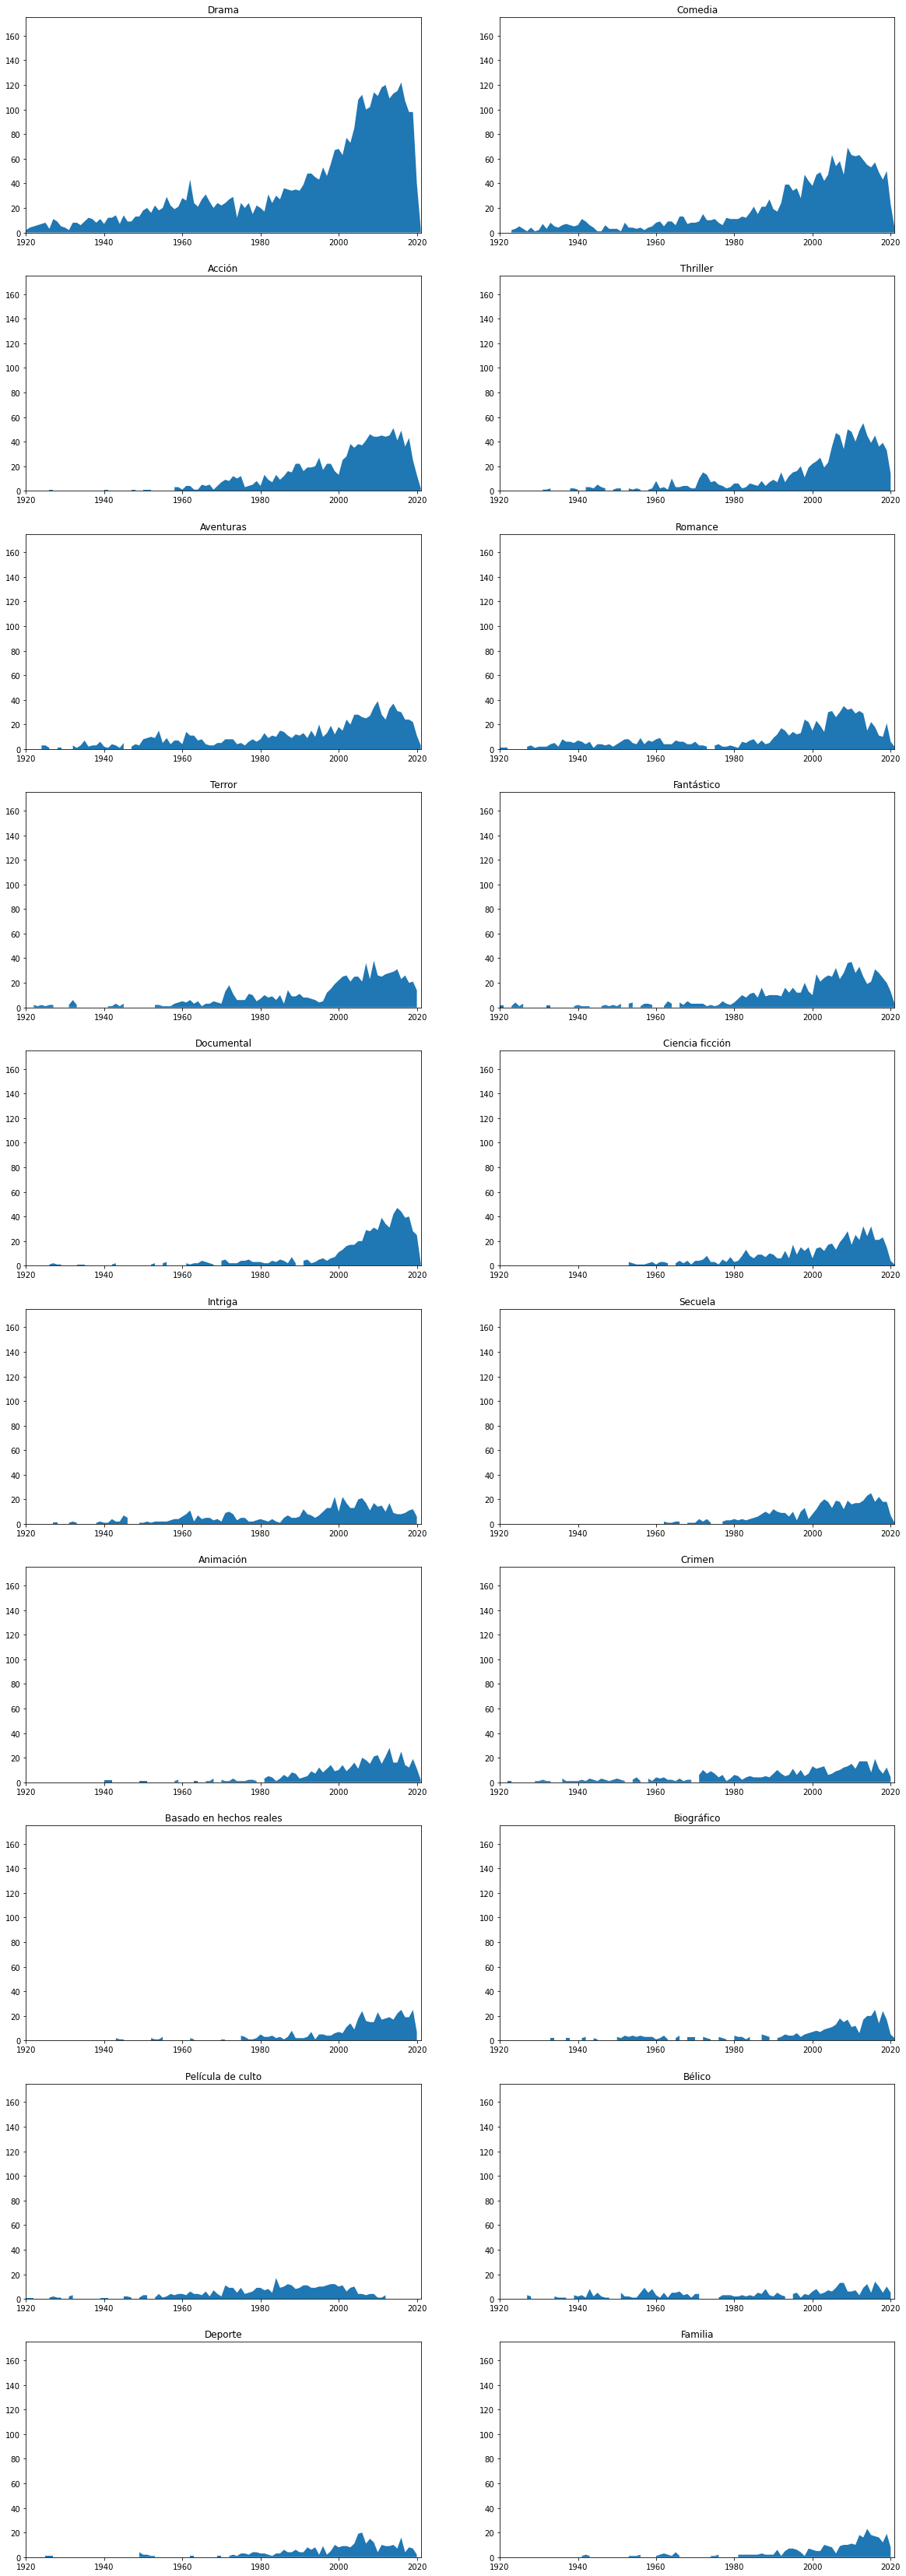

In [87]:
# Iteramos para ver las 20 gráficas sin tener que meterlas a mano

fig, ax = plt.subplots(10,2, figsize=(20,60))

for i in range(10):
    for j in range(2):
        currgen = top20generos.pop(0) # Con .pop() extrae el primer valor de la tabla y nos ahorramos otra iteración
        plt.sca(ax[i][j])
        plt.stackplot(genpiv.index, genpiv[currgen])
        plt.title(currgen)
        plt.xlim(1920,2021)
        plt.ylim(0, 175)

# 3. Top 10 actores

## Top 10 actores más valorados por década

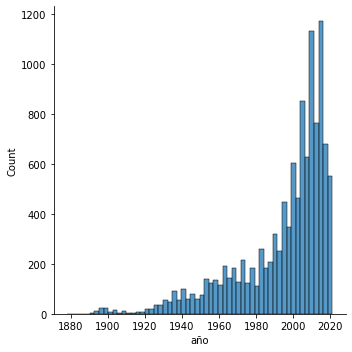

In [88]:
# Comprobamos la distribución de los años para ver a partir de qué década hay info relevante

_ = sns.displot(df.año) 

# Vemos que lo más adecuado es hacer los últimos 100 años desde 1920

In [90]:
%%sql

-- # 10 actores con media DE PELÍCULAS (no series) mejor valoradas de cada década
-- # Participación mínima en 5 películas

with tabaux3 as (
    
with tabaux2 as (

with tabaux as (
select pe.*, pa.id_act, ac.actor from Pelis pe
inner join 'Pelis-Actores' pa on pe.id_peli = pa.id_peli
inner join Actores ac on ac.id_act = pa.id_act
where ac.actor != 'Documental' and ac.actor != 'Animación' and pe.tipo == 'Película')

select decada, actor, round(avg(puntuacion), 2) as puntuacion, count(id_peli) as numpelis
from tabaux
group by actor, decada
having numpelis > 5
order by decada desc, puntuacion desc)

select *, dense_rank() over(partition by decada order by puntuacion desc) as rankdecada from tabaux2)

select * from tabaux3
where rankdecada < 11 and decada > 1919
order by decada desc, puntuacion desc
limit 10

 * sqlite:///./data/movies.db
Done.


decada,actor,puntuacion,numpelis,rankdecada
2010,Leonardo DiCaprio,7.21,8,1
2010,Tom Hardy,6.77,11,2
2010,Christian Bale,6.76,8,3
2010,Benedict Cumberbatch,6.71,13,4
2010,John Hawkes,6.67,6,5
2010,Sarah Paulson,6.64,6,6
2010,Robin Wright,6.6,7,7
2010,Ricardo Darín,6.59,6,8
2010,Bruce Dern,6.59,6,8
2010,Mark Ruffalo,6.57,13,9


In [94]:
query_top10actores_puntuacion = """with tabaux3 as (
    
with tabaux2 as (

with tabaux as (
select pe.*, pa.id_act, ac.actor from Pelis pe
inner join 'Pelis-Actores' pa on pe.id_peli = pa.id_peli
inner join Actores ac on ac.id_act = pa.id_act
where ac.actor != 'Documental' and ac.actor != 'Animación' and pe.tipo == 'Película')

select decada, actor, round(avg(puntuacion), 2) as puntuacion, count(id_peli) as numpelis
from tabaux
group by actor, decada
having numpelis > 5
order by decada desc, puntuacion desc)

select *, dense_rank() over(partition by decada order by puntuacion desc) as rankdecada from tabaux2)

select * from tabaux3
where rankdecada < 11 and decada > 1919
order by decada desc, puntuacion desc
"""

In [95]:
# La pasamos a .csv para manipular en Tableau

pd.read_sql(query_top10actores_puntuacion, db_url).to_csv('./data/SQL-top10actores_puntuacion.csv')

## Top 10 actores más populares por década

In [97]:
%%sql

-- # 10 actores con mayor número de votos en PELÍCULAS (no series) por década para medir la popularidad
-- # Participación mínima en 5 películas

with tabaux3 as (
    
with tabaux2 as (

with tabaux as (
select pe.*, pa.id_act, ac.actor from Pelis pe
inner join 'Pelis-Actores' pa on pe.id_peli = pa.id_peli
inner join Actores ac on ac.id_act = pa.id_act
where ac.actor != 'Documental' and ac.actor != 'Animación' and pe.tipo == 'Película')

select decada, actor, round(avg(votos), 2) as votos, count(id_peli) as numpelis
from tabaux
group by actor, decada
having numpelis > 5
order by decada desc, votos desc)

select *, dense_rank() over(partition by decada order by votos desc) as rankdecada from tabaux2)

select * from tabaux3
where rankdecada < 11 and decada > 1919
order by decada desc, votos desc
limit 10

 * sqlite:///./data/movies.db
Done.


decada,actor,votos,numpelis,rankdecada
2010,Leonardo DiCaprio,83763.88,8,1
2010,Michael Caine,53132.56,9,2
2010,Tom Hardy,48151.18,11,3
2010,Cillian Murphy,44866.57,7,4
2010,Helena Bonham Carter,43640.9,10,5
2010,Marion Cotillard,43393.0,10,6
2010,Joseph Gordon-Levitt,42912.11,9,7
2010,Sebastian Stan,42829.0,8,8
2010,Michael Gambon,42630.83,6,9
2010,Max von Sydow,41999.17,6,10


In [98]:
query_top10actores_votos = """
with tabaux3 as (
    
with tabaux2 as (

with tabaux as (
select pe.*, pa.id_act, ac.actor from Pelis pe
inner join 'Pelis-Actores' pa on pe.id_peli = pa.id_peli
inner join Actores ac on ac.id_act = pa.id_act
where ac.actor != 'Documental' and ac.actor != 'Animación' and pe.tipo == 'Película')

select decada, actor, round(avg(votos), 2) as votos, count(id_peli) as numpelis
from tabaux
group by actor, decada
having numpelis > 5
order by decada desc, votos desc)

select *, dense_rank() over(partition by decada order by votos desc) as rankdecada from tabaux2)

select * from tabaux3
where rankdecada < 11 and decada > 1919
order by decada desc, votos desc"""

In [99]:
pd.read_sql(query_top10actores_votos, db_url).to_csv('./data/SQL-top10actores_votos.csv')

# 4. Varios

## Pelis por actor

In [100]:
%%sql
-- # Esta es la query que necesitamos (sin el limit 10)
select pe.*, ac.actor
    from Pelis pe
inner join 'Pelis-Actores' pa on pe.id_peli = pa.id_peli
inner join Actores ac on ac.id_act = pa.id_act
where tipo == 'Película' and año > 1919 and actor != 'Documental' and actor != 'Animación'
order by id_peli asc
limit 10

 * sqlite:///./data/movies.db
Done.


id_peli,titulo,año,pais,tipo,puntuacion,votos,decada,actor
1,La noche más oscura (Zero Dark Thirty),2012,Estados Unidos,Película,6.79,36704,2010,Jessica Chastain
1,La noche más oscura (Zero Dark Thirty),2012,Estados Unidos,Película,6.79,36704,2010,Joel Edgerton
1,La noche más oscura (Zero Dark Thirty),2012,Estados Unidos,Película,6.79,36704,2010,Taylor Kinney
1,La noche más oscura (Zero Dark Thirty),2012,Estados Unidos,Película,6.79,36704,2010,Kyle Chandler
1,La noche más oscura (Zero Dark Thirty),2012,Estados Unidos,Película,6.79,36704,2010,Jennifer Ehle
1,La noche más oscura (Zero Dark Thirty),2012,Estados Unidos,Película,6.79,36704,2010,Mark Strong
1,La noche más oscura (Zero Dark Thirty),2012,Estados Unidos,Película,6.79,36704,2010,Chris Pratt
1,La noche más oscura (Zero Dark Thirty),2012,Estados Unidos,Película,6.79,36704,2010,James Gandolfini
1,La noche más oscura (Zero Dark Thirty),2012,Estados Unidos,Película,6.79,36704,2010,Stephen Dillane
1,La noche más oscura (Zero Dark Thirty),2012,Estados Unidos,Película,6.79,36704,2010,Mark Duplass


In [101]:
query_pelisporactor = '''
select pe.*, ac.actor
    from Pelis pe
inner join 'Pelis-Actores' pa on pe.id_peli = pa.id_peli
inner join Actores ac on ac.id_act = pa.id_act
where tipo == 'Película' and año > 1919 and actor != 'Documental' and actor != 'Animación'
order by id_peli asc'''

In [102]:
pd.read_sql(query_pelisporactor, db_url).to_csv('./data/SQL-pelisporactor.csv')

## Scatter plot puntuación-votos
Con esta scatter plot podemos comprobar algo que quizás sea obvio, que cuanto más votos reciben las pelis, mayor probabilidad de que su puntuación media sea alta

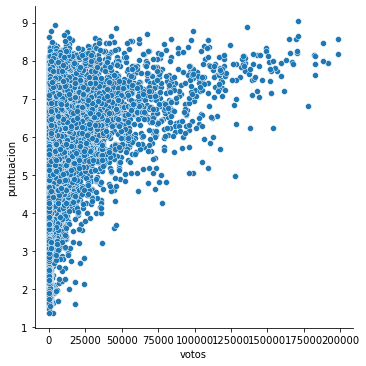

In [103]:
_ = sns.relplot(data=df, x='votos', y='puntuacion', kind='scatter')